In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('portuguese_armada_dataset.csv')
data = data.dropna()
data.head()

,battle,year,portuguese_ships,dutch_ships,english_ships,ratio_of_portuguese_to_other_ships,spanish_involvement_1yes_0no,portuguese_outcome_-1defeat_0draw_1victory
0,Bantam,1601,6,3,0,2.000,0,0
1,Malacca Strait,1606,14,11,0,1.273,0,0
2,Ilha das Naus,1606,6,9,0,0.667,0,-1
3,Pulo Butum,1606,7,9,0,0.778,0,1
4,Surrat,1615,6,0,4,1.500,0,0


In [3]:
X = data[['spanish_involvement_1yes_0no', 'english_ships', 'dutch_ships', 'portuguese_ships']]
y = data['portuguese_outcome_-1defeat_0draw_1victory']

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [5]:
model = SVC(kernel = 'poly',degree = 3)

In [6]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [7]:
print(accuracy_score(y_test,predictions))


0.4444444444444444


In [8]:
print(confusion_matrix(y_test,predictions))


[[0 4 0]
 [0 4 0]
 [0 1 0]]


In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.44      1.00      0.62         4
           1       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.15      0.33      0.21         9
weighted avg       0.20      0.44      0.27         9



/Users/aliqazi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aliqazi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aliqazi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

In [11]:
pop = data.iloc[:,1:10].drop('year', axis = 1)
X = data[data.columns.difference(['battle'])]

In [12]:
model = GaussianMixture(n_components = 7, init_params='random', max_iter=100)
model.fit(X,pop)

GaussianMixture(init_params='random', n_components=7)

In [13]:
yhat = model.predict(X)
yhat

array([3, 2, 3, 2, 2, 3, 0, 4, 3, 6, 3, 3, 3, 3, 3, 6, 5, 1, 5, 0, 1, 5,
       6, 0, 1, 3, 3, 3])

In [14]:
print("AIC:",model.aic(X))
print("BIC:",model.bic(X))

AIC: 54.065579934405434
BIC: 388.44891198838155


In [15]:
aic_score = {} 
bic_score = {}
for n in range(2,5):
    for i in range(6):
        #gmm = GaussianMixture(n_components=i, random_state=0).fit(pop)
        model = GaussianMixture(n_components = n, init_params='random', max_iter=100).fit(X)
        aic_score[i] = model.aic(X)
        bic_score[i] = model.bic(X)
        model.fit(pop)
        
        yhat = model.predict(pop)
        print(i, "epoch:", n, "clusters")
        print("AIC:",model.aic(pop))
        print("BIC:",model.bic(pop))

0 epoch: 2 clusters
AIC: 475.5000851857989
BIC: 548.7713332454351
1 epoch: 2 clusters
AIC: 390.58796435014904
BIC: 463.85921240978524
2 epoch: 2 clusters
AIC: 390.5879643501489
BIC: 463.85921240978513
3 epoch: 2 clusters
AIC: 430.532332578674
BIC: 503.8035806383102
4 epoch: 2 clusters
AIC: 556.6898766391082
BIC: 629.9611246987445
5 epoch: 2 clusters
AIC: 370.81185861641654
BIC: 444.08310667605275
0 epoch: 3 clusters
AIC: 303.2957539411633
BIC: 413.8687282857052
1 epoch: 3 clusters
AIC: 457.0080779335616
BIC: 567.5810522781035
2 epoch: 3 clusters
AIC: 59.82364628881767
BIC: 170.3966206333596
3 epoch: 3 clusters
AIC: 315.42147740020783
BIC: 425.99445174474977
4 epoch: 3 clusters
AIC: 92.88316712650908
BIC: 203.456141471051
5 epoch: 3 clusters
AIC: 299.74151479163675
BIC: 410.3144891361786
0 epoch: 4 clusters
AIC: 138.6470864996449
BIC: 286.5217871290925
1 epoch: 4 clusters
AIC: 199.32075552086445
BIC: 347.19545615031205
2 epoch: 4 clusters
AIC: 241.02103102066962
BIC: 388.8957316501172
3

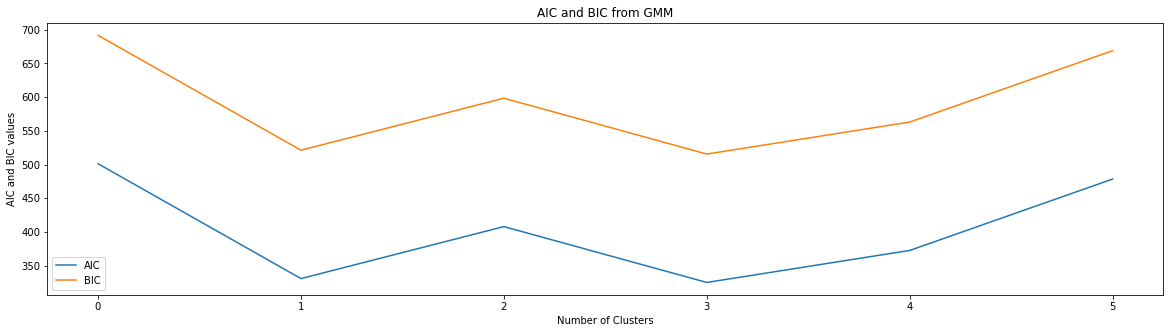

In [16]:
plt.figure(figsize=(20,5))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()